In [82]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [83]:
import random
random.seed(20)
# Random Dataset generation
X = 6 * np.random.rand(200,1) - 3
Y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1) # np.random.randn(200,1 is the noise added)

# Y = 0.8 * X**2 + 0.9*X + 2 model to find 0.8,0.9,2

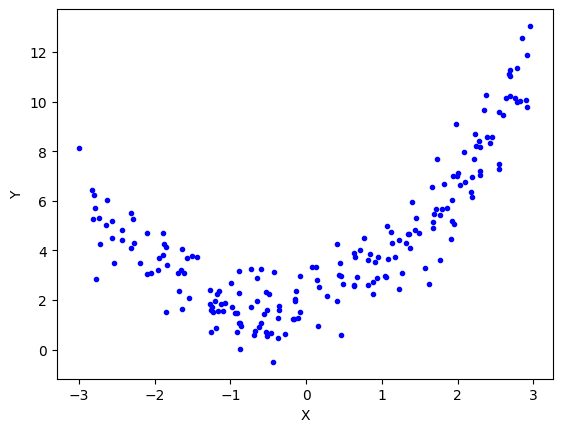

In [84]:
plt.plot(X,Y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [85]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
r2_score(Y_test,Y_pred)

-0.1359421261787972

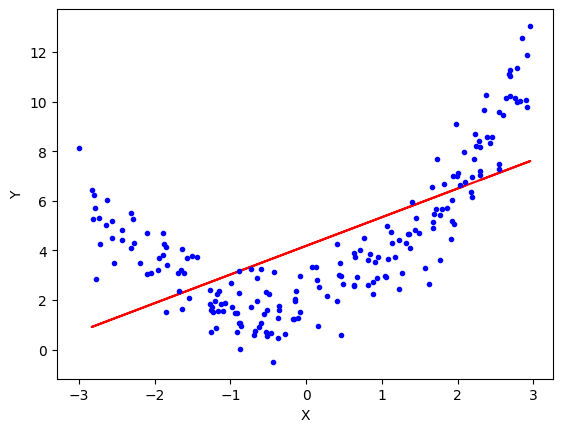

In [88]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,Y,"b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [89]:
ploy = PolynomialFeatures(degree=2, include_bias=True) 
# include_bias = False will only give X^1,X^2, intercept will not be there

X_train_trans = ploy.fit_transform(X_train)
X_test_transform = ploy.transform(X_test)

In [90]:
print(X_train[0])
print(X_train_trans[0]) # (X^0,X^1,X^2)

[2.08690248]
[1.         2.08690248 4.35516197]


In [91]:
lr = LinearRegression()
lr.fit(X_train_trans,Y_train)


LinearRegression()

In [92]:
Y_pred = lr.predict(X_test_transform)
r2_score(Y_test,Y_pred)

0.7840199753013599

In [93]:
lr.coef_ # diue to random noise we can't get exact

array([[0.        , 0.89773067, 0.77691585]])

In [94]:
lr.intercept_

array([1.97923673])

In [95]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = ploy.transform(X_new)
Y_new = lr.predict(X_new_poly)

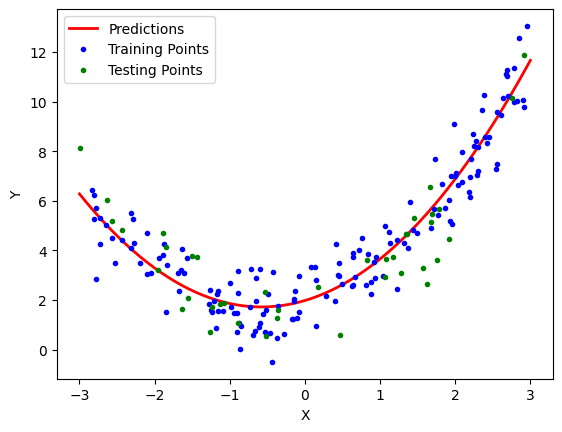

In [96]:
plt.plot(X_new,Y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X_train,Y_train,"b.",label='Training Points')
plt.plot(X_test,Y_test,"g.",label='Testing Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [97]:
def Polynomial_Regression(degree):
    X_new = np.linspace(-3,3,100).reshape(100,1)
    X_new_poly = ploy.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_sacler = StandardScaler()
    lin_reg = LinearRegression()
    Polynomial_Regression = Pipeline([
        ('Poly_features',polybig_features),
        ('std_sacler',std_sacler),
        ("lin_reg",lin_reg)
    ])

    Polynomial_Regression.fit(X,Y)
    Y_newbig = Polynomial_Regression.predict(X_new)
    plt.plot(X_new,Y_newbig,'r',label="Degree = " + str(degree) , linewidth=2)


    plt.plot(X_train,Y_train,"b.",linewidth=3)
    plt.plot(X_test,Y_test,"g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3,3,0,10])
    plt.show()

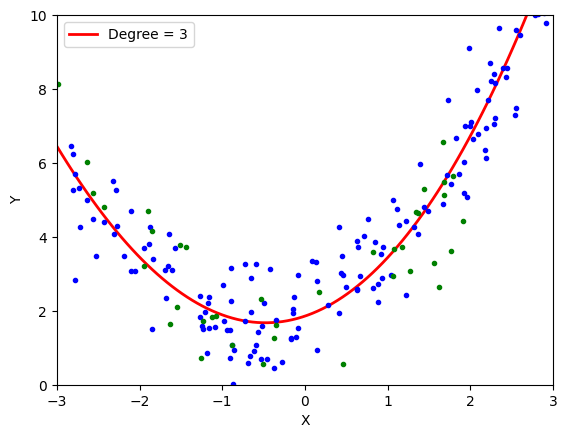

In [98]:
Polynomial_Regression(3)

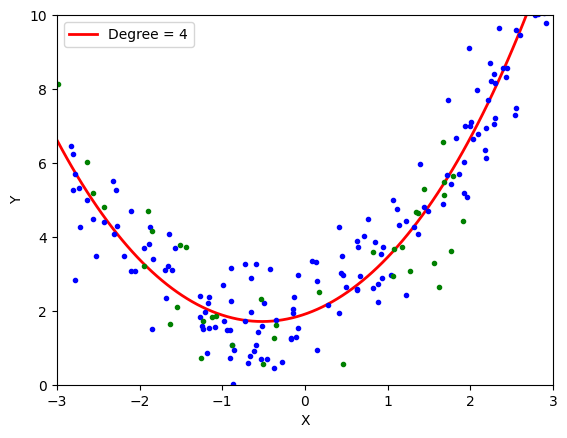

In [99]:
Polynomial_Regression(4)

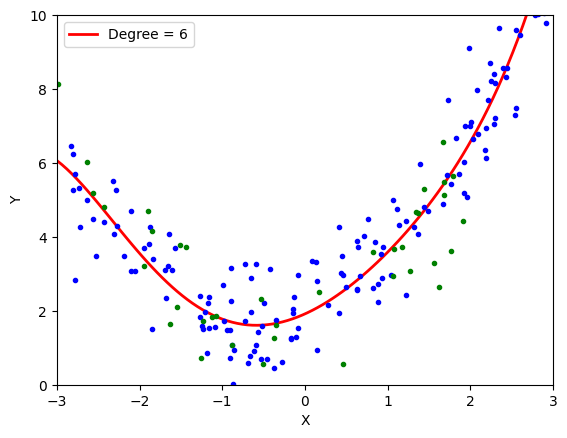

In [100]:
Polynomial_Regression(6)

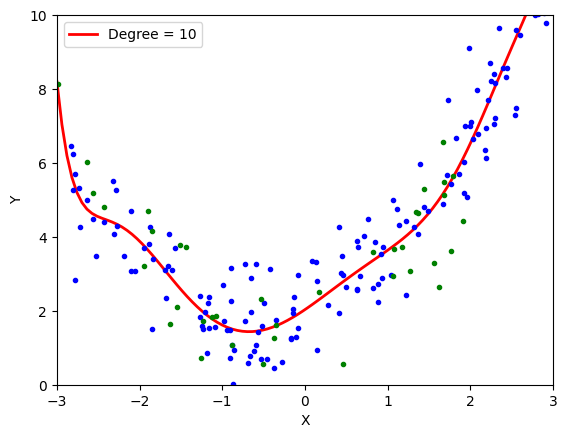

In [101]:
Polynomial_Regression(10)

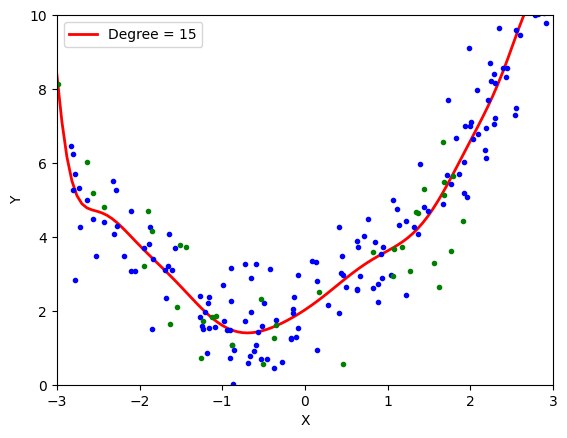

In [102]:
Polynomial_Regression(15)

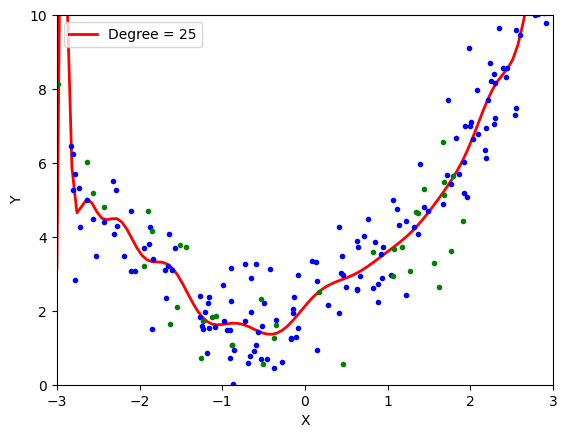

In [103]:
Polynomial_Regression(25)

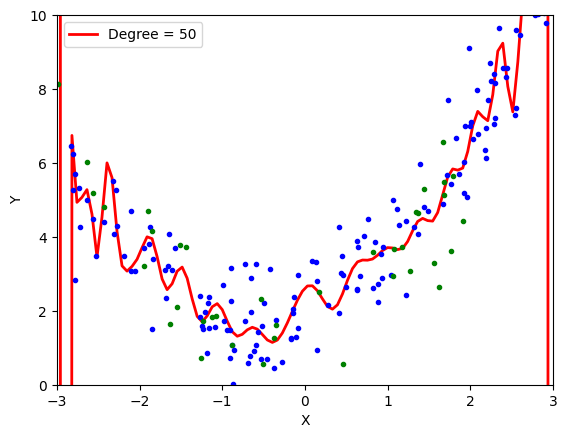

In [104]:
Polynomial_Regression(50)

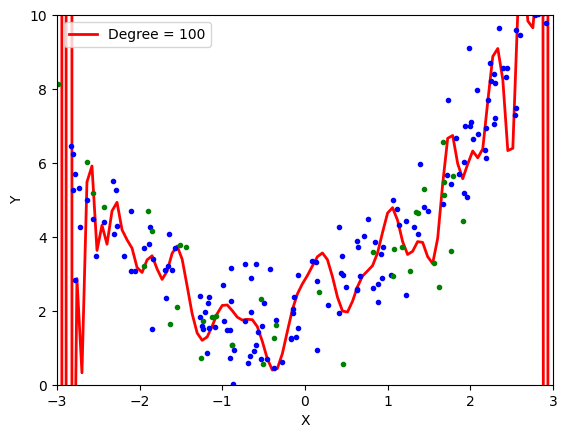

In [105]:
Polynomial_Regression(100)

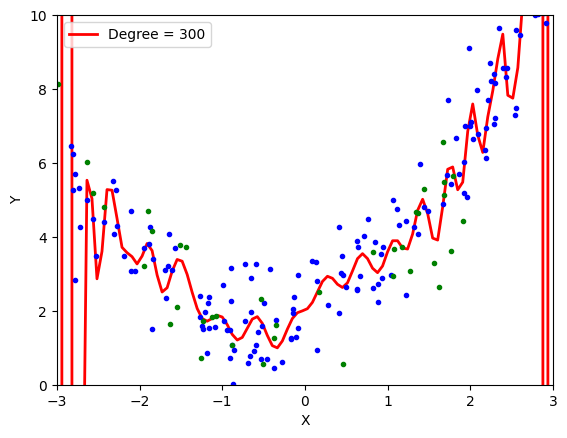

In [106]:
Polynomial_Regression(300)

In [107]:
X = 7 * np.random.rand(100,1) - 2.8
Y = 7 * np.random.rand(100,1) - 2.8

Z = X**2 + Y**2 + 0.2*X + 0.2*Y + 0.1*X*Y + 2 + np.random.randn(100,1)

# Z = X**2 + Y**2 + 0.2*X + 0.2*Y + 0.1*X*Y + 2

In [108]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x=X.ravel(),y = Y.ravel(),z = Z.ravel())
fig.show()

In [109]:
lr = LinearRegression()
lr.fit(np.array([X,Y]).reshape(100,2),Z)

x_input = np.linspace(X.min(),X.max(),10)
y_input = np.linspace(Y.min(),Y.max(),10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [110]:
import plotly.graph_objects as go
fig = px.scatter_3d(df,x=X.ravel(),y = Y.ravel(),z= Z.ravel())

fig.add_trace(go.Surface(x=x_input,y = y_input,z=z_final))

fig.show()

In [111]:
X_multi = np.array([X,Y]).reshape(100,2)
X_multi.shape

(100, 2)

In [118]:
X_multi

array([[ 2.78924514,  3.81682303],
       [-1.38019182, -1.20283185],
       [-2.22506112,  1.07344896],
       [ 3.84055444,  0.47487065],
       [-0.62686713, -0.96711436],
       [-2.21024732,  3.04999261],
       [ 1.18919602,  3.02412574],
       [-0.61727829,  3.42383894],
       [-2.16405065, -1.12746044],
       [ 2.2784116 , -0.90742659],
       [-2.54806228,  3.95245119],
       [ 3.86843286,  2.72136886],
       [-0.33434431, -0.95076914],
       [ 1.60816727, -0.00809387],
       [-2.15563903, -1.54714927],
       [ 2.16226952, -0.80418148],
       [ 1.37120717,  0.16980514],
       [ 0.63446721,  1.58319242],
       [-0.25992315,  1.64498147],
       [ 2.79833253, -0.32070315],
       [-2.50844842,  0.57345649],
       [-2.41859917,  0.50957108],
       [ 2.51671613, -1.07407619],
       [ 0.3232932 , -0.38361927],
       [-2.05867543, -1.86775598],
       [ 3.65691008,  0.2681736 ],
       [-2.5415598 ,  0.97006815],
       [ 0.80333156,  0.61231182],
       [-2.04682967,

In [120]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [121]:
print(f"Input = {poly.n_features_in_}")
print(f"Output = {poly.n_output_features_}")
print(f'Powers\n{poly.powers_}')

Input = 2
Output = 6
Powers
[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [122]:
X_multi_trans.shape

(100, 6)

In [124]:
lr = LinearRegression()
lr.fit(X_multi_trans,Z)

LinearRegression()

In [125]:
X_test_multi = poly.transform(final)

In [126]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [129]:
fig = px.scatter_3d(x = X.ravel(),y=Y.ravel(),z=Z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

In [130]:
poly = PolynomialFeatures(degree=6)
X_multi_trans = poly.fit_transform(X_multi)
print(f"Input = {poly.n_features_in_}")
print(f"Output = {poly.n_output_features_}")
print(f'Powers\n{poly.powers_}')

Input = 2
Output = 28
Powers
[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]
 [6 0]
 [5 1]
 [4 2]
 [3 3]
 [2 4]
 [1 5]
 [0 6]]


In [131]:
lr = LinearRegression()
lr.fit(X_multi_trans,Z)

LinearRegression()

In [132]:
X_test_multi = poly.transform(final)

In [133]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [134]:
fig = px.scatter_3d(x = X.ravel(),y=Y.ravel(),z=Z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()